In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
data = [[3.0, 1.0, 1],
        [2.8, 0.9, 1],
        [1.2, 1.8, 0],
        [0.9, 1.6, 0],
        [1.3, 1.5, 0],
        [2.5, 1.2, 1],
        [2.2, 1.0, 1],
        [1.1, 1.9, 0],
      ]
secret_flower = [2.9, 1.1]


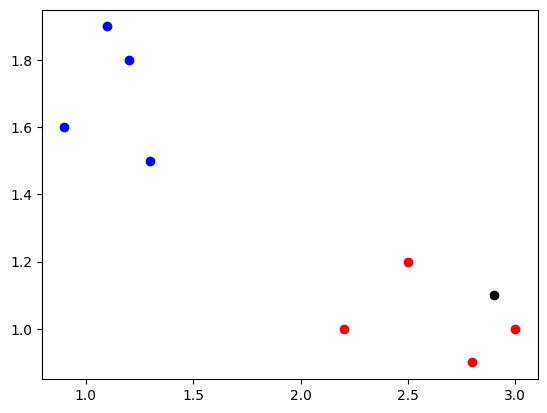

In [3]:
for i in data:
    color = "r"
    if i[2]==0:
        color="b"
    plt.scatter(i[0],i[1],color=color)
plt.scatter(secret_flower[0],secret_flower[1],color="black")

In [4]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
print(w1,w2,b)

1.775385072773734 1.0228053642640047 -0.2369660338297721


In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

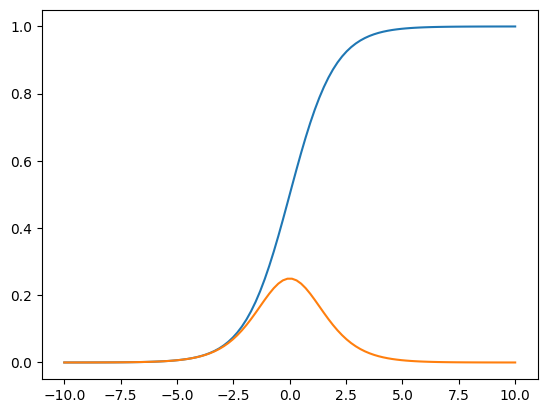

In [6]:

X = np.linspace(-10, 10, 100)
Y = sigmoid(X)
Y_P = sigmoid_p(X)

plt.plot(X,Y)
plt.plot(X,Y_P)

In [7]:
def network(flower):
    return w1 * flower[0] + w2 * flower[1] + b

4.691686490536448 4.691686490536448
3.6053303381815107 3.6053303381815107
5.6247258710475245 5.6247258710475245
5.624750719007057 5.624750719007057
3.6329226102118857 3.6329226102118857
5.3692076571334395 5.3692076571334395
4.638977010294597 4.638977010294597
3.680342731855714 3.680342731855714
5.568664458416576 5.568664458416576
6.020049659580405 6.020049659580405
2.9268676349797276 2.9268676349797276
3.5316712714150316 3.5316712714150316
5.938240332094561 5.938240332094561
5.4922110834807105 5.4922110834807105
3.460130191941543 3.460130191941543
3.5474464332861437 3.5474464332861437
2.807455223858602 2.807455223858602
5.1413342574512 5.1413342574512
5.141392702008385 5.141392702008385
3.3890134285969866 3.3890134285969866
3.3255655058468445 3.3255655058468445
3.319311196070223 3.319311196070223
3.259275896343744 3.259275896343744
5.650739644058767 5.650739644058767
3.2253948745719003 3.2253948745719003
5.1810030418253845 5.1810030418253845
4.942055147213743 4.942055147213743
5.181153

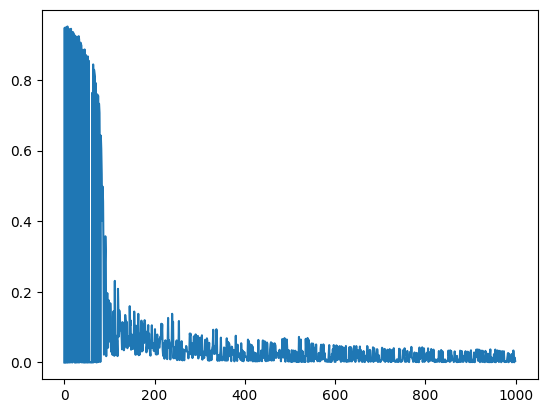

In [8]:
# training loop
costs = []
LR = 0.1

for i in range(1000):
    random_index = np.random.randint(len(data))
    flower = data[random_index]
    
    # nn =  w1 * flower[0] + w2 * flower[1] + b
    nn = network(flower)
    
    print(network(flower),w1 * flower[0] + w2 * flower[1] + b)
    # print(w1 * flower[0] + w2 * flower[1] + b)

    result = sigmoid(nn)

    expected = flower[2]

    cost = (result - expected)**2
    
    # print(result, expected)

    costs.append(cost)

    d_cost_d_result = 2*(result - expected)

    d_result_d_nn = sigmoid_p(nn)

    d_nn_d_w1 = flower[0]
    d_nn_d_w2 = flower[1]
    d_nn_d_b = 1

    d_cost_d_w1 = d_cost_d_result * d_result_d_nn * d_nn_d_w1
    d_cost_d_w2 = d_cost_d_result * d_result_d_nn * d_nn_d_w2
    d_cost_d_b = d_cost_d_result * d_result_d_nn * d_nn_d_b

    w1 = w1 - d_cost_d_w1*LR
    w2 = w2 - d_cost_d_w2*LR
    b = b - d_cost_d_b*LR

    # print(w1,w2,b)
    # print(result,cost)
plt.plot(costs)
print(w1,w2,b)


In [29]:
width = np.linspace(0,5,retstep=0.1)
length = np.linspace(0,5,retstep=0.1)

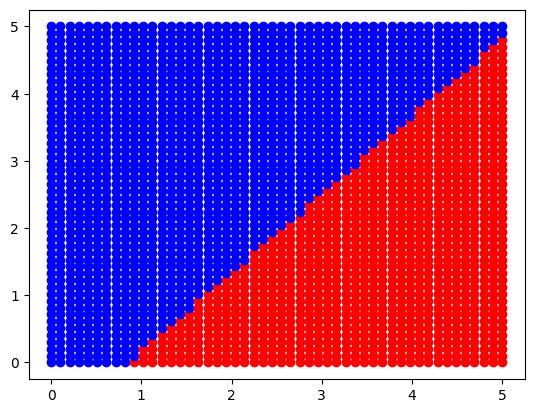

In [30]:
for w in width[0]:
    for l in length[0]:
        color = 'r'
        if(network([w,l])<0.5):
            color = 'b'
        plt.scatter(w,l,color=color)